In [1]:
import pandas as pd
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
def data(ticker):
    stock = yf.Ticker(ticker)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)
    hist_data = stock.history(start=start_date, end=end_date)
    
    return hist_data
user_ticker = input("Enter the stock ticker symbol (e.g., AAPL for Apple or BTC-USD for bitcoin): ").upper()
print(data)


<function data at 0x000001A0B9C31120>


In [2]:
try:
    # Fetch the data
    df = data(user_ticker)
    
    # Display the data
    print(f"\nHistorical data for {user_ticker}:")
    print(df)
    
    # Optional: Save to CSV
    csv_filename = f"{user_ticker}_1year_history.csv"
    df.to_csv(csv_filename)
    print(f"\nData saved to {csv_filename}")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check if the ticker symbol is correct and try again.")


Historical data for BTC-USD:
                                   Open          High           Low  \
Date                                                                  
2023-07-18 00:00:00+00:00  30147.070312  30233.656250  29556.427734   
2023-07-19 00:00:00+00:00  29862.046875  30184.181641  29794.269531   
2023-07-20 00:00:00+00:00  29915.250000  30195.531250  29638.095703   
2023-07-21 00:00:00+00:00  29805.111328  30045.998047  29733.851562   
2023-07-22 00:00:00+00:00  29908.697266  29991.615234  29664.121094   
...                                 ...           ...           ...   
2024-07-12 00:00:00+00:00  57341.195312  58532.554688  56590.175781   
2024-07-13 00:00:00+00:00  57908.738281  59787.078125  57796.441406   
2024-07-14 00:00:00+00:00  59225.250000  61329.527344  59225.250000   
2024-07-15 00:00:00+00:00  60815.457031  64870.152344  60704.929688   
2024-07-16 00:00:00+00:00  64784.417969  65354.339844  62487.968750   

                                  Close       

In [3]:
# Get the last 14 closing prices
last_14_closes = df['Close'].tail(14)

# Get the closing prices from 15 to 28 days ago
last_15_to_28_closes = df['Close'].iloc[-28:-14]

# Calculate the sum of these last 14 closing prices
sum_of_last_14_closes = last_14_closes.sum()

# Calculate the sum of these 14 which is the 2nd sma for this list closing prices
sum_of_last_15_to_28_closes = last_15_to_28_closes.sum()

# Adjusting to get the closing prices from 29 to 43 days ago 3rd sma
last_29_to_43_closes = df['Close'].iloc[-43:-28]

sum_of_last_29_to_43_closes = last_29_to_43_closes.sum()


# Print the sum
print("Sum of last 14 closing prices Most CURRENT:", sum_of_last_14_closes)
print("Sum of last 15 to 28 closing prices:", sum_of_last_15_to_28_closes)
print("Sum of last 29 to 43 closing prices:", sum_of_last_29_to_43_closes)

Sum of last 14 closing prices Most CURRENT: 825654.89453125
Sum of last 15 to 28 closing prices: 874583.46484375
Sum of last 29 to 43 closing prices: 1023018.18359375


In [4]:
sma_14day=( sum_of_last_14_closes/14)
sma_28day = (sum_of_last_15_to_28_closes/14)
sma_43day = (sum_of_last_29_to_43_closes/14)
print(sma_14day)
print(sma_28day)
print(sma_43day)

58975.349609375
62470.24748883928
73072.72739955357


                                  Close         SMA20    Upper_Band  \
Date                                                                  
2024-06-27 00:00:00+00:00  61604.800781  65354.225391  70986.709987   
2024-06-28 00:00:00+00:00  60320.136719  64904.943555  70642.785188   
2024-06-29 00:00:00+00:00  60887.378906  64466.912891  70014.607044   
2024-06-30 00:00:00+00:00  62678.292969  64125.213477  69184.828066   
2024-07-01 00:00:00+00:00  62851.980469  63901.210938  68755.562720   
2024-07-02 00:00:00+00:00  62029.015625  63590.602344  68055.026350   
2024-07-03 00:00:00+00:00  60173.921875  63261.478516  67713.742960   
2024-07-04 00:00:00+00:00  56977.703125  62809.808984  67877.829893   
2024-07-05 00:00:00+00:00  56662.375000  62333.377734  67835.946089   
2024-07-06 00:00:00+00:00  58303.539062  61916.602344  67307.598859   
2024-07-07 00:00:00+00:00  55849.109375  61384.542969  66971.794472   
2024-07-08 00:00:00+00:00  56705.097656  60962.760547  66629.146943   
2024-0

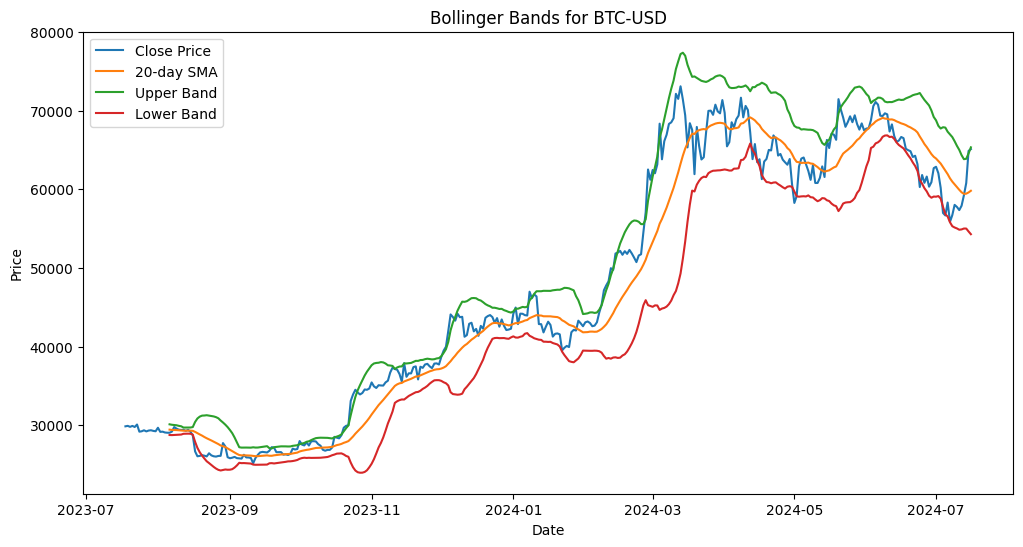

In [5]:


# Calculate 20-day SMA
df['SMA20'] = df['Close'].rolling(window=20).mean()

# Calculate 20-day standard deviation
df['20_day_SD'] = df['Close'].rolling(window=20).std()

# Calculate Bollinger Bands
df['Upper_Band'] = df['SMA20'] + (df['20_day_SD'] * 2)
df['Lower_Band'] = df['SMA20'] - (df['20_day_SD'] * 2)

# Display the last 20 rows of the dataframe with Bollinger Bands
print(df[['Close', 'SMA20', 'Upper_Band', 'Lower_Band']].tail(20))

# Optional: Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA20'], label='20-day SMA')
plt.plot(df.index, df['Upper_Band'], label='Upper Band')
plt.plot(df.index, df['Lower_Band'], label='Lower Band')
plt.title(f'Bollinger Bands for {user_ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
